In [1]:
!pip install numpy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control

ModuleNotFoundError: No module named 'skfuzzy'

In [3]:
!pip install skfuzzy

ERROR: Could not find a version that satisfies the requirement skfuzzy (from versions: none)
ERROR: No matching distribution found for skfuzzy


In [4]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 3.3 MB/s eta 0:00:01
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894068 sha256=f1ea29ffc910dad8eef129704ba0ae9e25c97bd0f7ddba331d9b3b836ba1ca2d
  Stored in directory: /home/jovyan/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [5]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [6]:
quality = ctrl.Antecedent(np.arrange(0,11,1),'quality')

AttributeError: module 'numpy' has no attribute 'arrange'

In [7]:
quality = ctrl.Antecedent(np.arange(0,11,1),'quality')

In [8]:
services = ctrl.Antecedent(np.arange(0,11,1),'services')

In [9]:
tip = ctrl.Consequent(np.arange(0,26,1),'tip')

In [10]:
quality.automf(3)

In [11]:
service.automf(3)

NameError: name 'service' is not defined

In [12]:
services.automf(3)

In [13]:
tip['low']=fuzz.trimf(tip.universe,[0,0,13])

In [14]:
tip['medium']=fuzz.trimf(tip.universe,[0,13,25])

In [15]:
tip['high']=fuzz.trimf(tip.universe,[13,25,25])

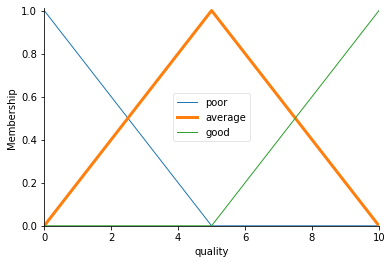

In [16]:
quality['average'].view()

In [17]:
service.view()

NameError: name 'service' is not defined

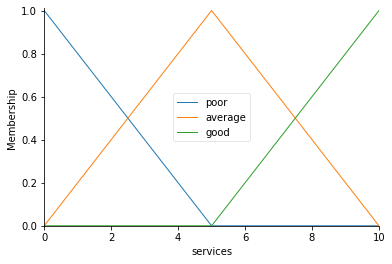

In [18]:
services.view()

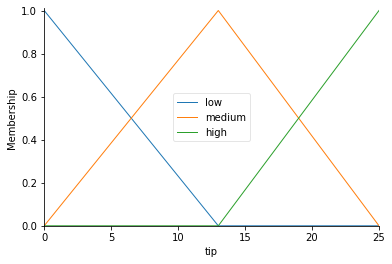

In [19]:
tip.view()

In [20]:
r1 = ctrl.Rule(quality['poor'] | services['poor'], tip['low'])

In [21]:
r2 = ctrl.Rule(services['average'], tip['medium'])

In [22]:
r3 = ctrl.Rule(services['good'] | quality['good'], tip['high'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a5b7df3d0>)

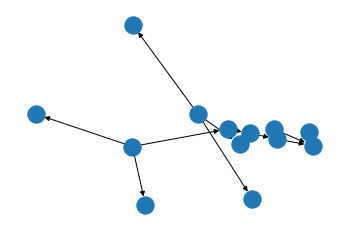

In [23]:
r1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a5b7895d0>)

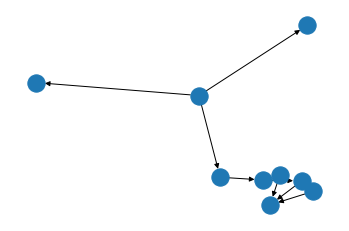

In [24]:
r2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a51e5efd0>)

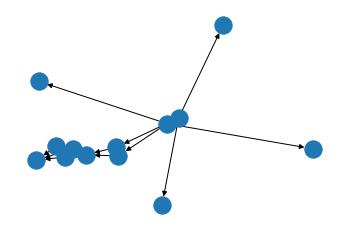

In [25]:
r3.view()

In [26]:
tipping = ctrl.ControlSystemSimulation(ctrl.ControlSystem([r1,r2,r3]))

In [27]:
tipping.input['quality']=6.5

In [28]:
tipping.input['services']=9.8

In [29]:
tipping.compute()

In [30]:
tipping.output['tip']

19.847607361963192

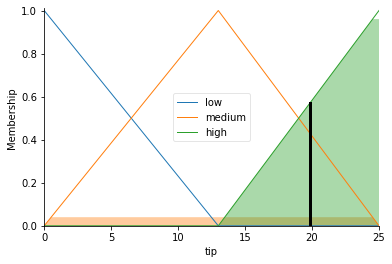

In [31]:
tip.view(sim=tipping)